In [1]:
import pandas as pd
import numpy as np
import matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

# for setting a theme ????
sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('anime_ratings_data.csv')

In [3]:
data.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


In [4]:
data.shape

(6523, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [6]:
data.describe()

,eps,duration,startYr,finishYr,watched,watching,rating,votes
count,6523.000000,6248.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6496.000000
mean,8.716235,18.396287,2005.241147,2005.575349,1347.948643,57.445654,2.962553,906.253233
std,11.002479,20.949350,12.911035,12.568169,1737.138112,76.527405,0.760486,1171.677648
min,1.000000,1.000000,1967.000000,1970.000000,5.000000,0.000000,1.111000,10.000000
25%,1.000000,5.000000,2000.000000,2000.000000,56.000000,2.000000,2.371000,34.000000
50%,1.000000,7.000000,2010.000000,2010.000000,349.000000,13.000000,2.944000,227.500000
75%,12.000000,25.000000,2015.000000,2015.000000,2252.500000,98.000000,3.568000,1567.750000
max,34.000000,67.000000,2020.000000,2020.000000,4649.000000,199.000000,4.702000,3100.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [9]:
BM_MV = ['mediaType','duration','votes']
for L in BM_MV:
    print(data[L].unique())

['Movie' 'TV Special' 'DVD Special' 'TV' 'Web' 'OVA' 'Music Video' 'Other'
 nan]
[67.   5.  46.   4.   3.  11.  50.   6.   1.  45.5 26.  25.  18.   2.
 24.   8.  29.  16.  20.  15.  21.  14.  45.  40.  34.  10.   nan 12.
 47.  59.  22.  38.   7.  60.  30.   9.5 17.  51.  31.  66.  48.  23.
 52.   9.  56.  32.5 65.  55.  19.  41.  49.  27.  28.  13.  37.  35.
 32.  13.5 41.5 36.5 44.   7.5 16.5  2.5 23.5 53.  33.  24.5 58.  43.
 25.5 42.  61.   3.5 39.  44.5 47.5 57.  64.  36.  62.  11.5 50.5  6.5
 54.   8.5 63.  30.5  5.5]
[3100.   10. 1103. ... 1725.  423. 1909.]


In [10]:
df = data.copy(deep=True)

In [11]:
def histogram_boxplot(data, feature, figsize=(15,10), kde=False, bins=None):
    """
    Histogram and boxplot combined
    
    data: dataframe
    feature: datafame column
    figsize: size of figure, default (15,10)
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, # number of rows of the subplot grid = 2
        sharex=True, # x-axis will be shared among all subplots
        gridspec_kw= {'height_ratios':(0.25, 0.75)},
        figsize=figsize
        ) 
    
    # creating the 2 subplots 
    
    # boxplot will be created and a triangle will indicate the mean value of the column
    sns.boxplot(
        data=data, # this is the dataframe to use
        x=feature, # this is the attribute/column/feature to use
        ax=ax_box2, # build boxplot in the ax_box2 subplot placeholder above
        showmeans=True, # show the arithmetic means
        color='violet'
        )
    
    #### the If bins is different. how does this work???
    #### this is one of those special if..then statements and has a special name
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    
    # add a vertical mean line to the histogram
    ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--')

    
    # add a vertical median line to the histogram
    ax_hist2.axvline(data[feature].median(), color='black', linestyle='-')

In [12]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    
    total = len(data[feature]) # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+2, 6))
    else:
        plt.figute(figsize=(n+2, 6))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette='Paired',
        order = data[feature].value_counts().index[:n],
        )
    
    for p in ax.patches:
        if perc==True:
            label = '{:.1f}%'.format(100*p.get_height()/total) # pecentage of each class of the category
        else:
            label = p.get_height() # height of the plot
        x = p.get_x() + p.get_width()/2 # width of the plot
        y = p.get_height()
        
        # annotate the percenta
        ax.annotate(
            label,
            (x,y),
            ha='center',
            va='center',
            size=12,
            xytext=(0,5),
            textcoords='offset points'
        )
    plt.show()
            

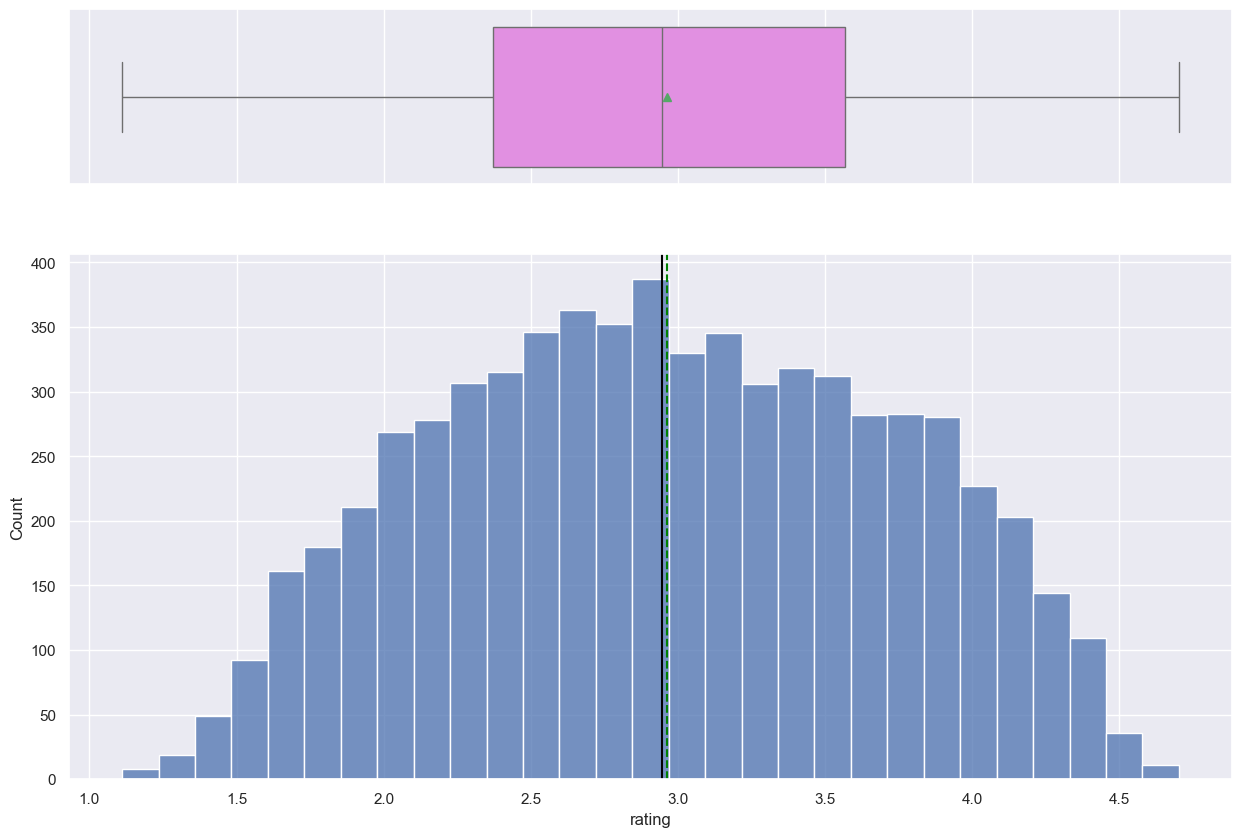

In [13]:
histogram_boxplot(df, 'rating')

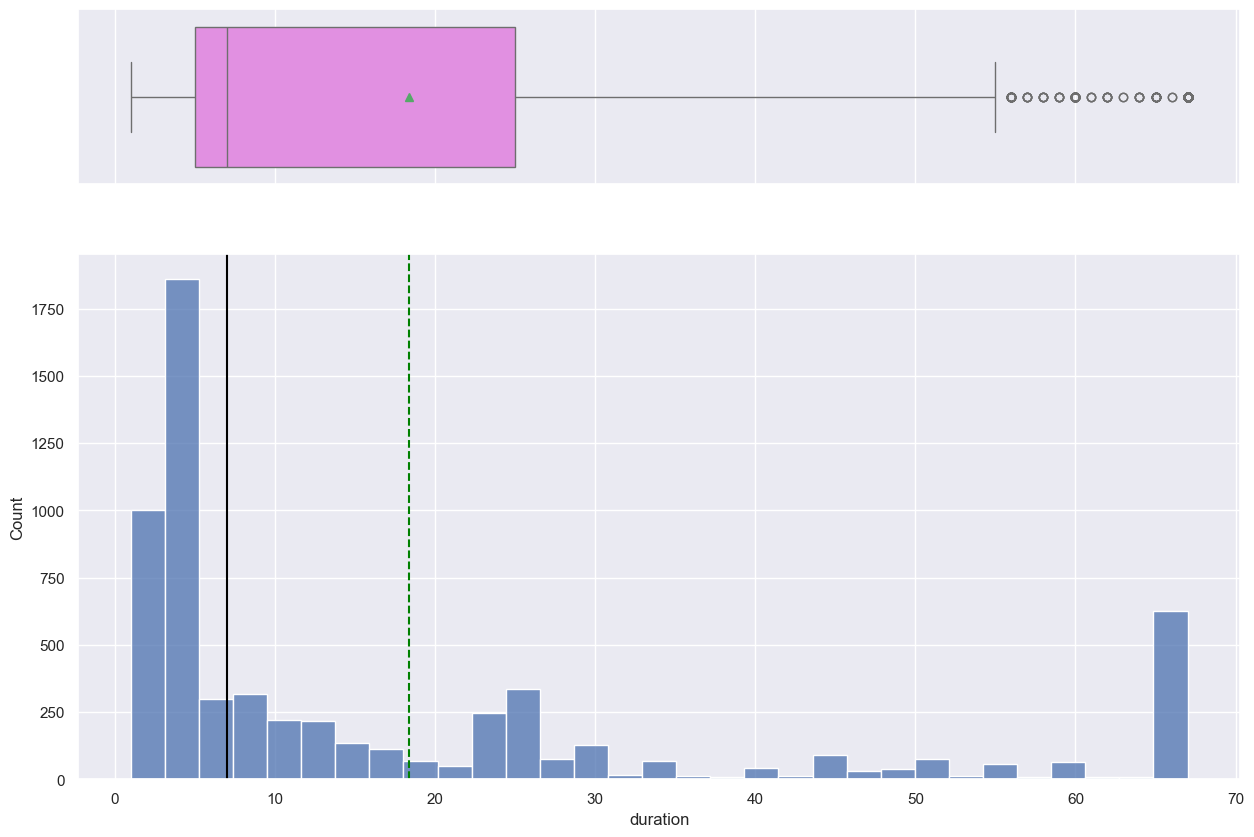

In [14]:
histogram_boxplot(df, "duration")

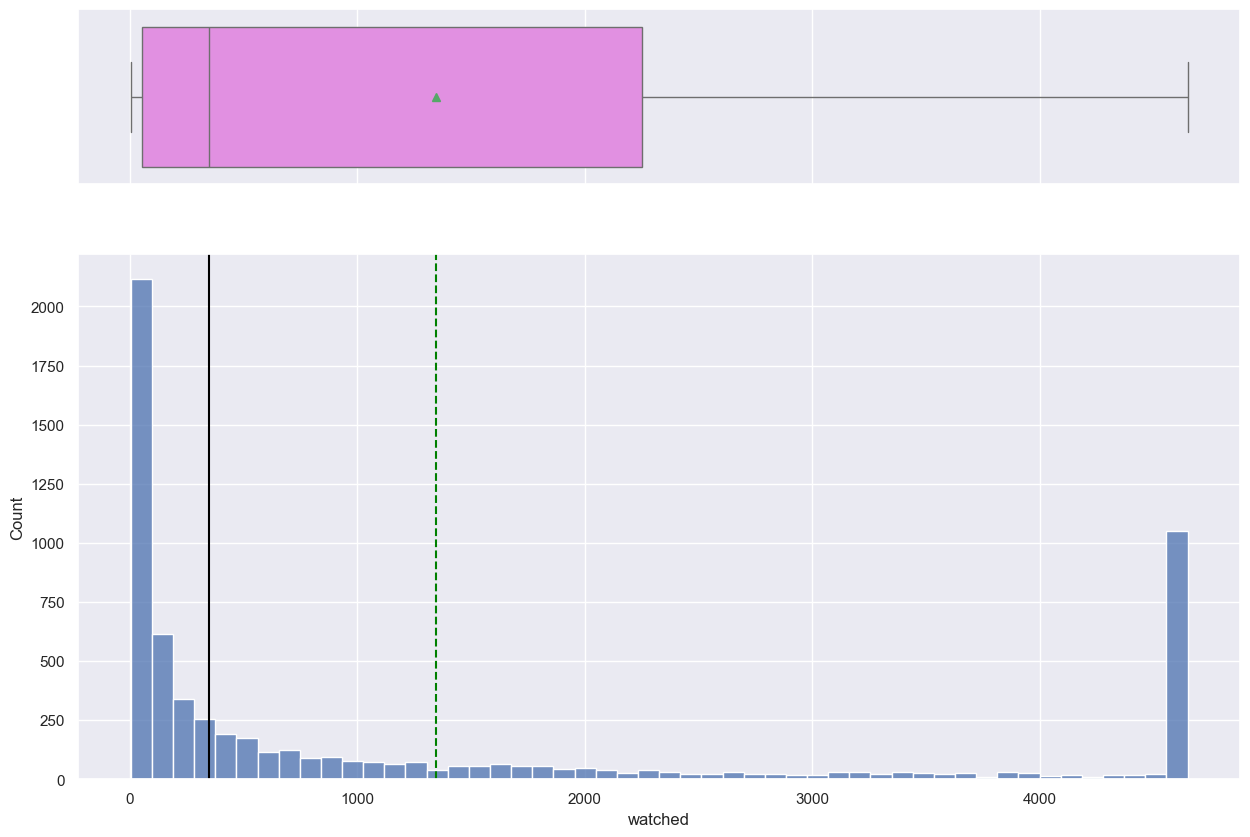

In [15]:
histogram_boxplot(df, 'watched', bins=50)

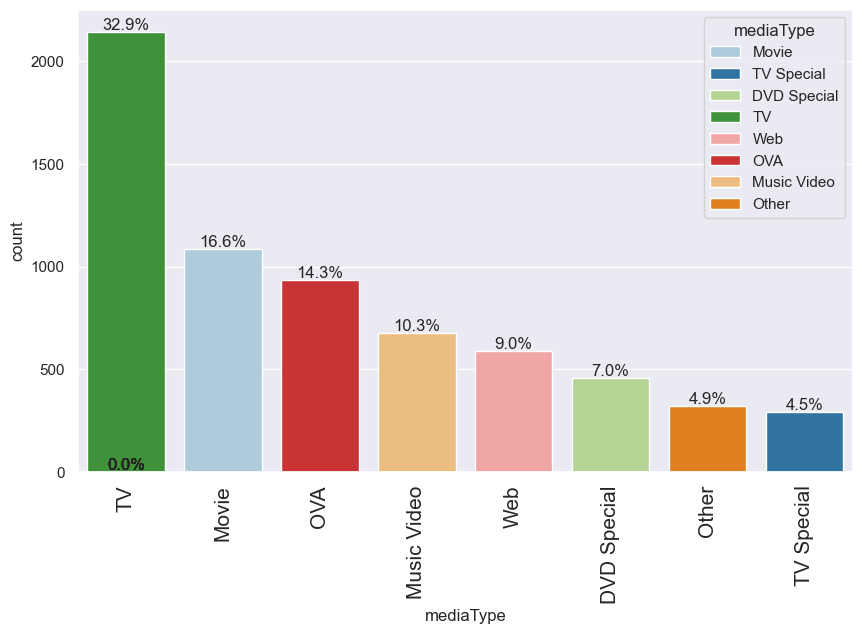

In [16]:
labeled_barplot(df, 'mediaType', perc=True)

In [73]:
# creating a list of the numerical columns 
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove('startYr')
num_cols.remove('finishYr')

In [78]:
df[num_cols].corr()

,eps,duration,watched,watching,rating,votes
eps,1.000000,-0.338987,0.141514,0.363967,0.196107,0.166889
duration,-0.338987,1.000000,0.116246,-0.100920,0.350919,0.091108
watched,0.141514,0.116246,1.000000,0.790051,0.736158,0.992732
watching,0.363967,-0.100920,0.790051,1.000000,0.643165,0.828073
rating,0.196107,0.350919,0.736158,0.643165,1.000000,0.729158
votes,0.166889,0.091108,0.992732,0.828073,0.729158,1.000000


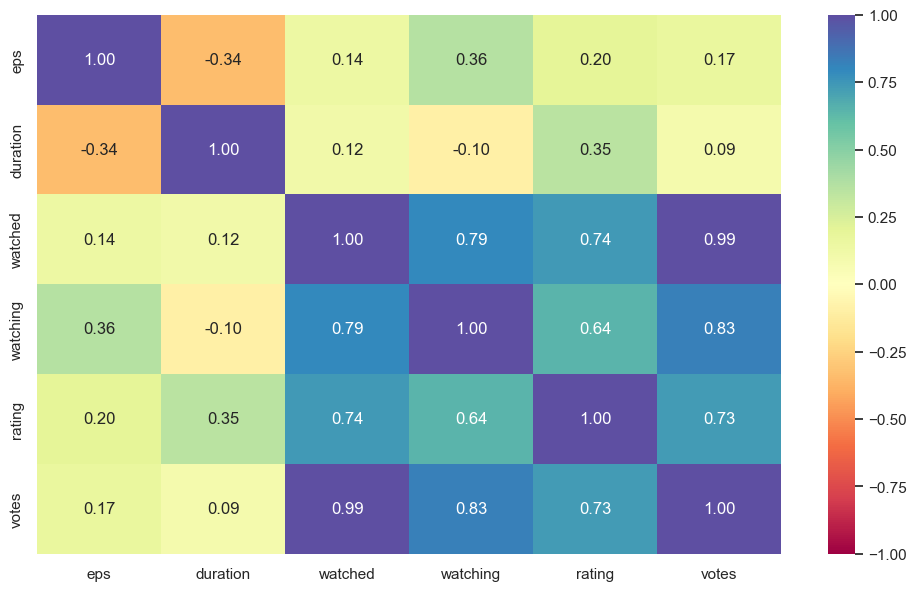

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(
    # get the correlation of the num_cols columns
    df[num_cols].corr(),
    # write the data value in each cell
    annot=True,
    # value to anchor the colormap 
    vmin=-1,
    # value to anchor the colormap
    vmax=1,
    #sring formatting to use when adding annotations
    fmt='.2f',
    # the color map to use for data values
    cmap='Spectral')
plt.show()

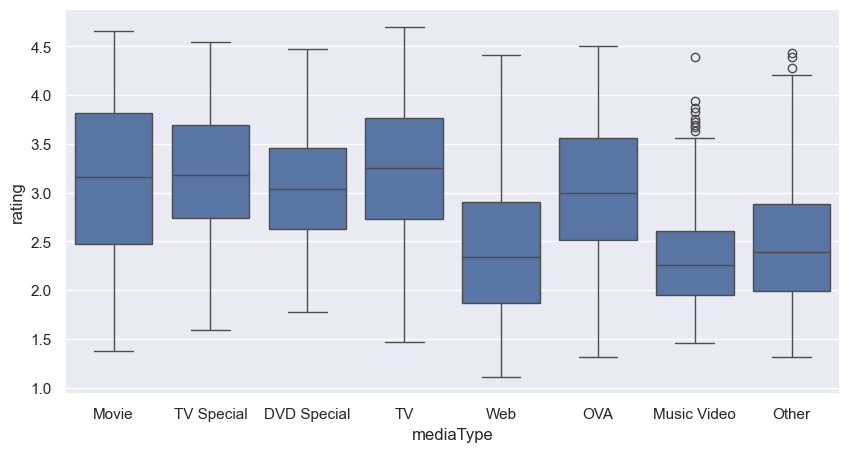

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='mediaType',y='rating')
plt.show()

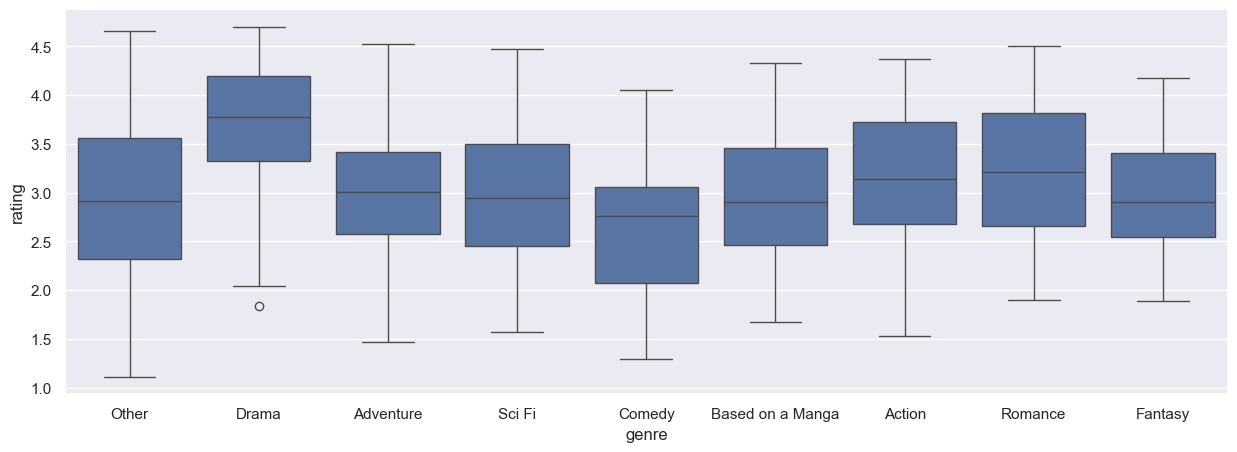

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='genre', y='rating')
plt.show()

<Axes: xlabel='genre', ylabel='watched'>

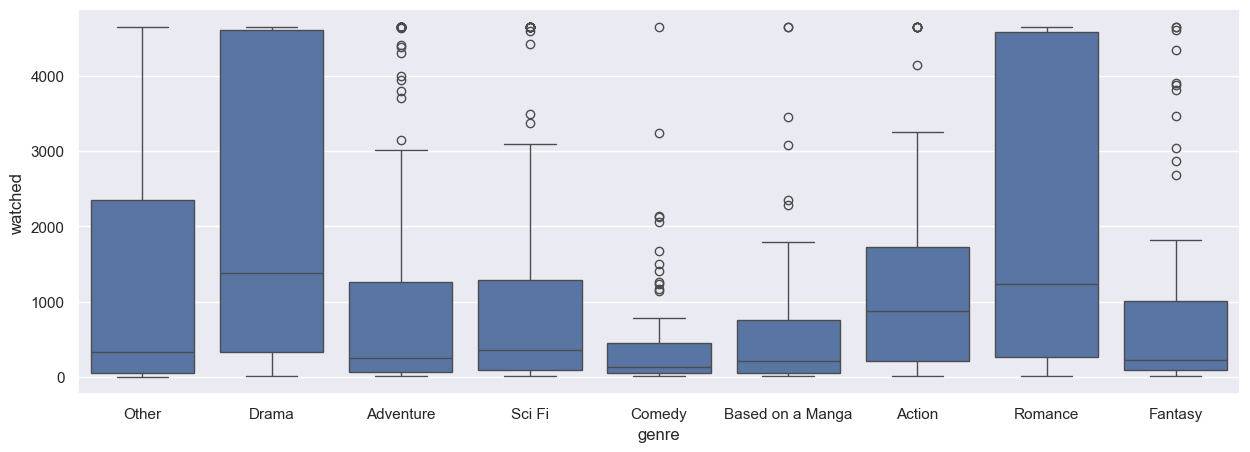

In [21]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='genre', y='watched')

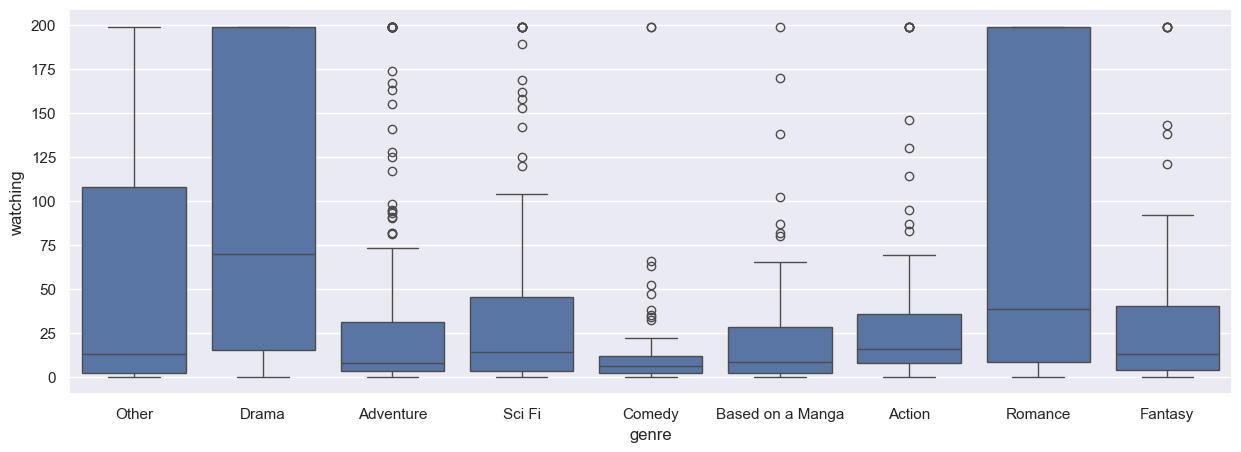

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='genre', y='watching')
plt.show()

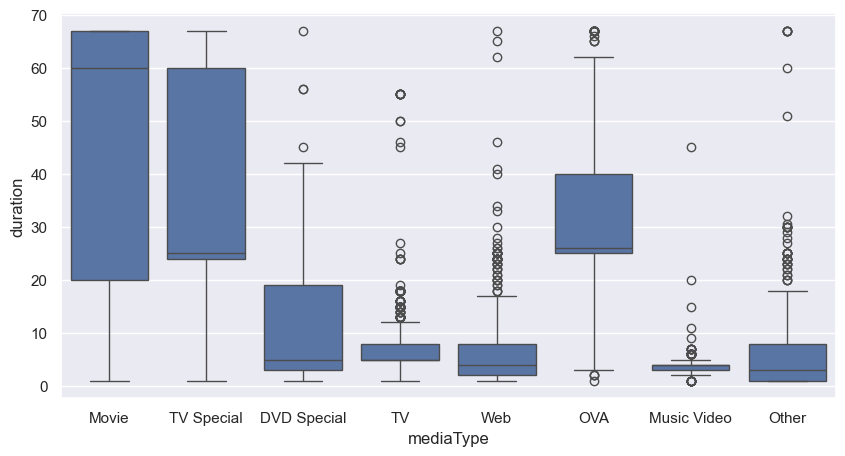

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="duration")
plt.show()

In [24]:
# adds up all the records with an NaN value
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [25]:
df1 = df.copy()

In [26]:
df1.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


In [27]:
# this fills in all the NaN values in the mediaType column with the value 'Other'
df1['mediaType'].fillna(value = 'Other', inplace=True)

In [28]:
df1['duration'] = df1['duration'].fillna(value = df1.groupby(['genre','mediaType'])['duration'].transform('median'))
df1['votes']= df1['votes'].fillna(value=df1.groupby(['genre','mediaType'])['votes'].transform('median'))
df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             8
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [68]:
df1.groupby(['genre','mediaType'])['duration'].transform('median')

0       50.0
1       50.0
2       25.0
3       67.0
4        5.0
        ... 
6518     5.0
6519    25.0
6520     4.0
6521     5.0
6522     5.0
Name: duration, Length: 6523, dtype: float64

In [29]:
# this takes all the records and calculates the median of the duration by the 'genre' column.
# then these values are used to update any duration records of NaN value with the median value for that genre  
df1['duration'] = df1['duration'].fillna(value=df1.groupby(['genre'])['duration'].transform('median'))
df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [30]:
df1.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


In [31]:
df1['years_running'] = df1['finishYr']-df1['startYr']
df1.drop(['startYr', 'finishYr'], axis=1, inplace=True)
df1.head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


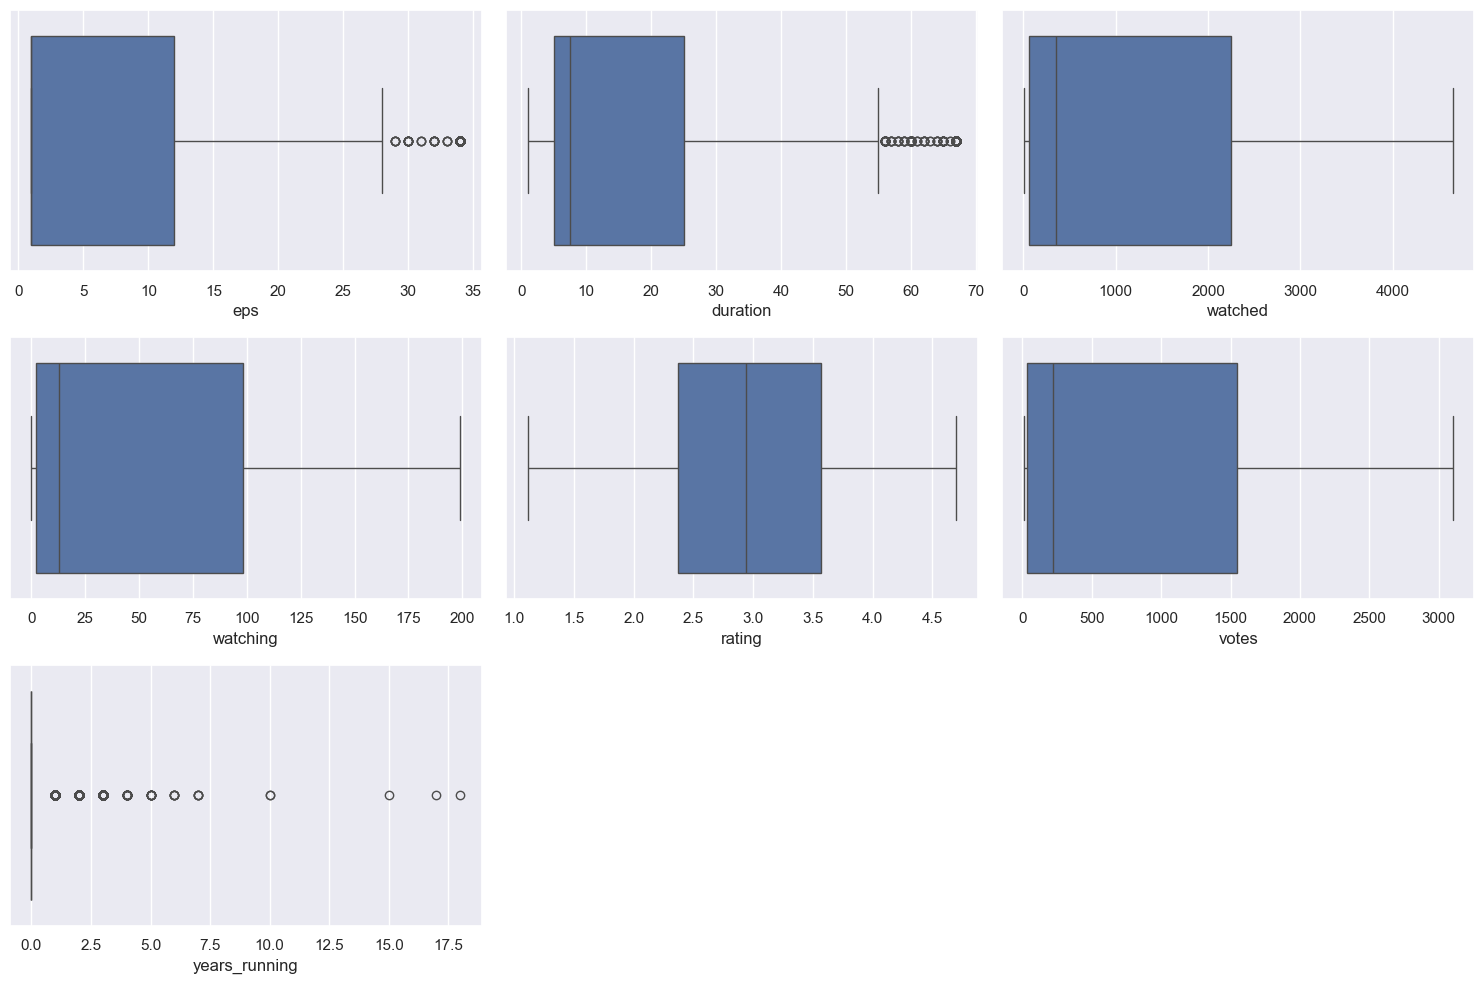

In [32]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = df1, x=variable)
    plt.tight_layout()
plt.show()

In [33]:
df1.drop(['title','description'], axis=1, inplace=True)
df1.head()

,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


In [47]:
x = df1.drop(['rating'], axis=1)
y = df1['rating']

print(x.head())
print(y.head())

     mediaType  eps  duration contentWarn  watched  watching   votes  \
0        Movie    1      67.0          No     4649        86  3100.0   
1        Movie    1       5.0          No       10         0    10.0   
2   TV Special    1      46.0          No     1630        16  1103.0   
3        Movie    1      67.0          No     4649       184  3100.0   
4  DVD Special    1       4.0          No      346         8   234.0   

   studio_primary studios_colab  genre  years_running  
0  Toei Animation            No  Other              0  
1          Others            No  Other              0  
2          Others            No  Other              0  
3          Others            No  Drama              0  
4          Others            No  Other              0  
0    3.979
1    2.120
2    3.758
3    4.444
4    2.494
Name: rating, dtype: float64


In [54]:
# add the intecept value to the x data
x = sm.add_constant(x)

In [91]:
x1 = df1.drop(['rating'], axis=1)

In [92]:
# add the intecept value to the x data
x1 = sm.add_constant(x)

In [93]:
x1

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1.0,67.0,4649.0,86.0,3100.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,5.0,10.0,0.0,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,46.0,1630.0,16.0,1103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,67.0,4649.0,184.0,3100.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,4.0,346.0,8.0,234.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,1.0,12.0,5.0,4649.0,199.0,3100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6519,1.0,2.0,44.5,341.0,9.0,208.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6520,1.0,1.0,4.0,25.0,0.0,14.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6521,1.0,24.0,7.5,4649.0,199.0,3100.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
x['const'].nunique()

1

In [56]:
x = pd.get_dummies(x, columns=x.select_dtypes(include=['object','category']).columns.tolist(),
                   drop_first=True)
x.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1.0,67.0,4649.0,86.0,3100.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,5.0,10.0,0.0,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,46.0,1630.0,16.0,1103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,67.0,4649.0,184.0,3100.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,4.0,346.0,8.0,234.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
x = x.astype(float)
x.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1.0,67.0,4649.0,86.0,3100.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,5.0,10.0,0.0,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,46.0,1630.0,16.0,1103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,67.0,4649.0,184.0,3100.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,4.0,346.0,8.0,234.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
# split the data into 70:30 ration between training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [59]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4566
Number of rows in test data = 1957


In [60]:
x_train

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
5432,1.0,3.0,40.0,399.0,11.0,213.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5326,1.0,1.0,5.0,24.0,0.0,15.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1021,1.0,4.0,28.0,4649.0,199.0,3100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
836,1.0,26.0,5.0,940.0,153.0,715.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1396,1.0,1.0,4.0,20.0,1.0,14.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,1.0,2.0,37.0,0.0,22.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5192,1.0,13.0,8.0,18.0,2.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3980,1.0,24.0,12.0,4649.0,199.0,3100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
235,1.0,34.0,5.0,4649.0,199.0,3100.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     357.4
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:34:01   Log-Likelihood:                -2307.9
No. Observations:                4566   AIC:                             4684.
Df Residuals:                    4532   BIC:                             4902.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [63]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

#function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets-predictions)/targets)*100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance
    
    model: regressor
    predictors: independent variable
    target: dependent variable
    """
    
    # predicting using the independent variables
    pred = model.predict(predictors)
    
    r2 = r2_score(target, pred) #  to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred) # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred)) # to compute RMSE
    mae = mean_absolute_error(target, pred) # to compute MAE
    mape = mape_score(target, pred) # to compute MAPE
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame( 
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )
    return df_perf

In [64]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40112,0.330417,0.722387,0.720304,12.444742


In [67]:
# checking model performance on train set (Seen 70% data)
print('Training Performance\n')
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40112,0.330417,0.722387,0.720304,12.444742
